# Zajęcie 3 (2024)

# Analiza PCA

In [50]:
import pandas as pd

file_path = "clean_diabetes_data.csv"
df = pd.read_csv(file_path)

df.head()

,Date,Time,Code,Value,Datetime
0,1988-03-27,08:00,58,134,1988-03-27 08:00:00
1,1988-03-27,08:00,34,20,1988-03-27 08:00:00
2,1988-03-27,12:00,60,158,1988-03-27 12:00:00
3,1988-03-27,18:00,62,258,1988-03-27 18:00:00
4,1988-03-28,08:00,58,115,1988-03-28 08:00:00


In [51]:
# Konwersja kolumny 'Datetime' na typ datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Filtrowanie tylko pomiarów glukozy (Code == 58)
glucose_df = df[df['Code'] == 58].copy()

# Ekstrakcja cech czasowych
glucose_df['Hour'] = glucose_df['Datetime'].dt.hour
glucose_df['DayOfWeek'] = glucose_df['Datetime'].dt.dayofweek

# Wybór cech do analizy
features = glucose_df[['Value', 'Hour', 'DayOfWeek']]

features.describe()


,Value,Hour,DayOfWeek
count,3518.000000,3518.000000,3518.000000
mean,170.695566,7.108300,2.952530
std,77.737178,1.215919,1.991814
min,23.000000,0.000000,0.000000
25%,108.000000,6.000000,1.000000
50%,161.000000,7.000000,3.000000
75%,223.000000,8.000000,5.000000
max,461.000000,23.000000,6.000000


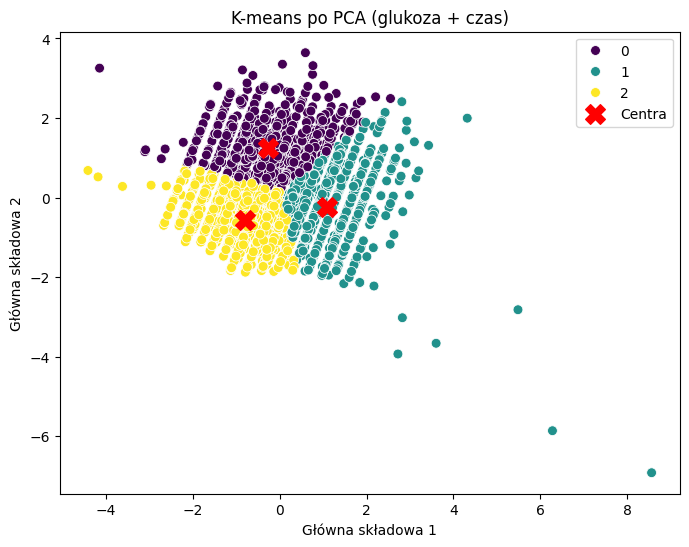

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Standaryzacja
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA (2 główne składowe)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# K-means po PCA
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans.fit_predict(features_pca)

# Wizualizacja skupień po PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters_pca, palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centra')
plt.title('K-means po PCA (glukoza + czas)')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.legend()
plt.show()


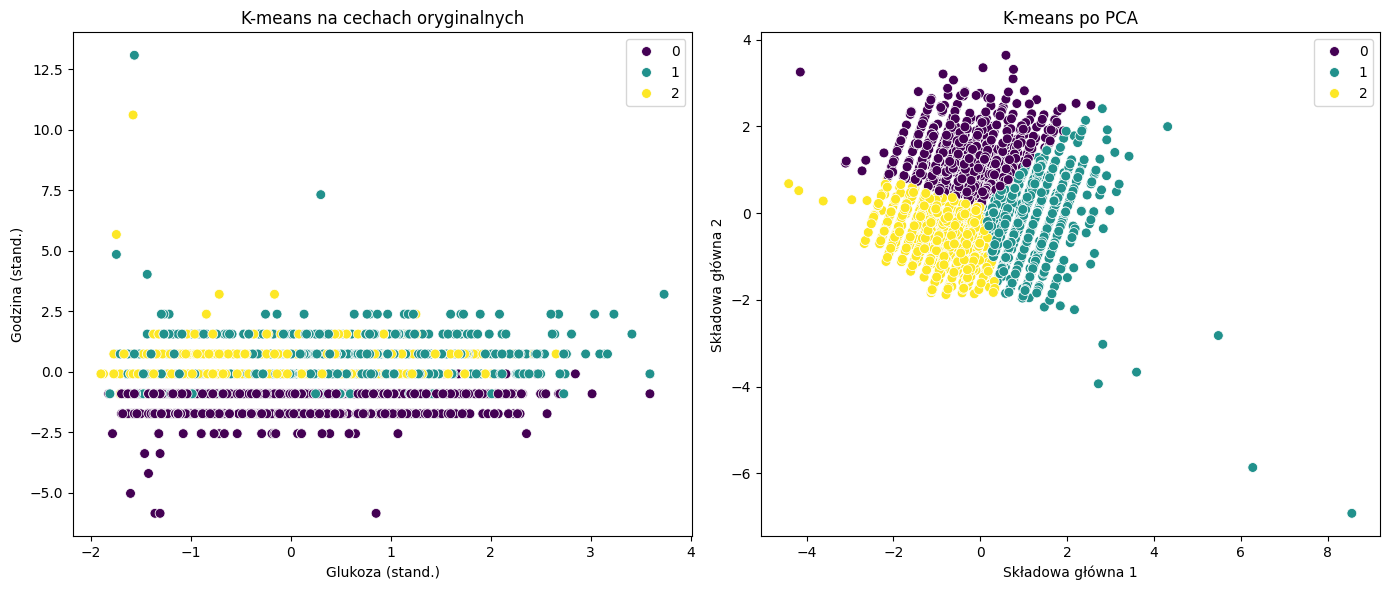

In [53]:
# K-means na oryginalnych (standaryzowanych) danych
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(features_scaled)

# Porównawcza wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Oryginalne dane (2 cechy standaryzowane: glukoza i godzina)
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=clusters_orig,
                palette='viridis', s=50, ax=axes[0])
axes[0].set_title("K-means na cechach oryginalnych")
axes[0].set_xlabel("Glukoza (stand.)")
axes[0].set_ylabel("Godzina (stand.)")

# 2. Dane po PCA
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=clusters_pca,
                palette='viridis', s=50, ax=axes[1])
axes[1].set_title("K-means po PCA")
axes[1].set_xlabel("Składowa główna 1")
axes[1].set_ylabel("Składowa główna 2")

plt.tight_layout()
plt.show()


# Metody niehierarchiczne

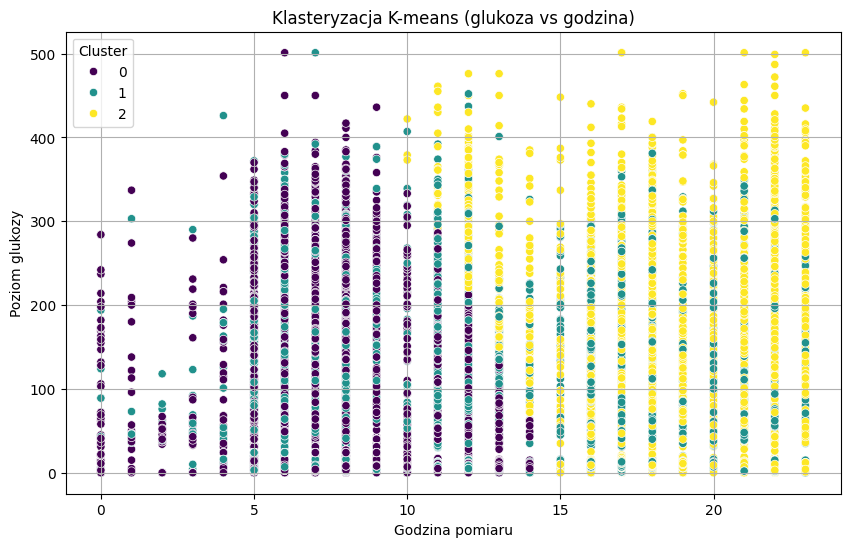

In [54]:
df['datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df['datetime'].dt.hour
df['DayOfWeek'] = df['datetime'].dt.dayofweek  
# 0 = poniedziałek

# Wybór cech do klasteryzacji
features = df[['Value', 'Hour', 'DayOfWeek']]

# Standaryzacja
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-means (przykładowo: 3 klastry)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(features_scaled)

# Dodanie etykiet do danych
df['Cluster'] = labels

# Wizualizacja: glukoza względem godziny, pokolorowane klastrami
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Hour'], y=df['Value'], hue=df['Cluster'], palette='viridis')
plt.title('Klasteryzacja K-means (glukoza vs godzina)')
plt.xlabel('Godzina pomiaru')
plt.ylabel('Poziom glukozy')
plt.grid(True)
plt.show()


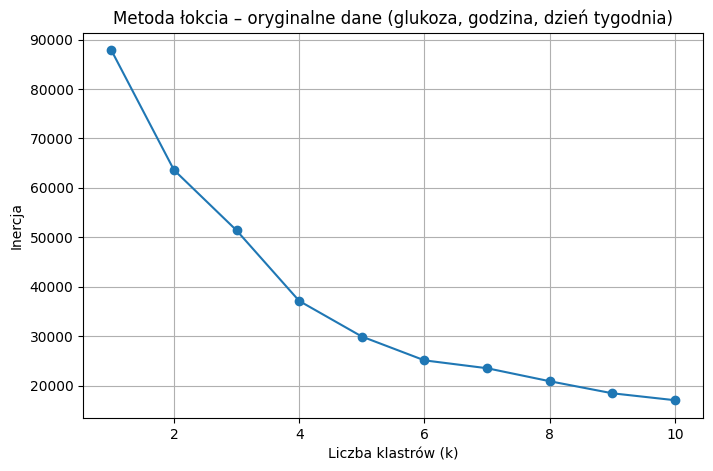

In [55]:
# Zakres liczby klastrów
inertia = []
K_range = range(1, 11)

# Obliczanie inercji (suma odległości punktów od centrów klastrów) dla różnych k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Wykres
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Metoda łokcia – oryginalne dane (glukoza, godzina, dzień tygodnia)')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inercja')
plt.grid(True)
plt.show()


In [56]:
from sklearn.decomposition import PCA

# PCA do 2 głównych składowych
pca = PCA(n_components=2)
data_pca = pca.fit_transform(features_scaled)

# Klasteryzacja na danych po PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(data_pca)

# Dodanie etykiet do danych PCA
df['Cluster_PCA'] = labels_pca


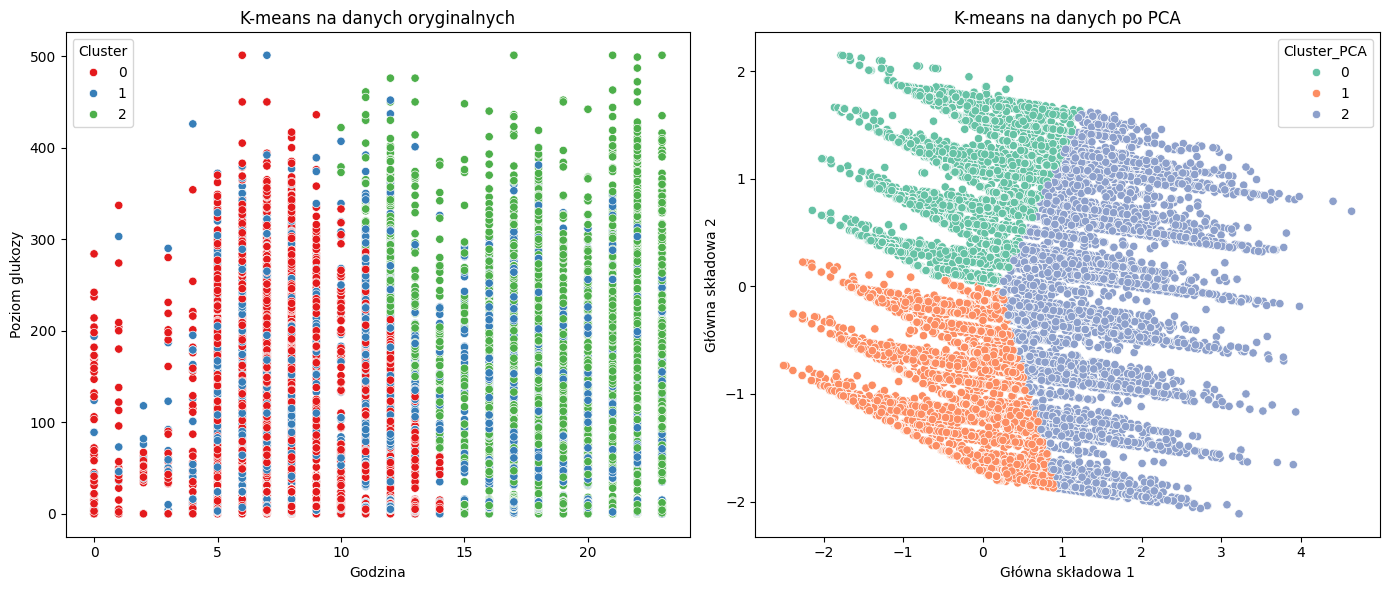

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Klasteryzacja na danych oryginalnych (glukoza vs godzina)
sns.scatterplot(x=df['Hour'], y=df['Value'], hue=df['Cluster'], palette='Set1', ax=axs[0])
axs[0].set_title('K-means na danych oryginalnych')
axs[0].set_xlabel('Godzina')
axs[0].set_ylabel('Poziom glukozy')

# Klasteryzacja na danych po PCA
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster_PCA'], palette='Set2', ax=axs[1])
axs[1].set_title('K-means na danych po PCA')
axs[1].set_xlabel('Główna składowa 1')
axs[1].set_ylabel('Główna składowa 2')

plt.tight_layout()
plt.show()


# Klasteryzacja hierarchiczna

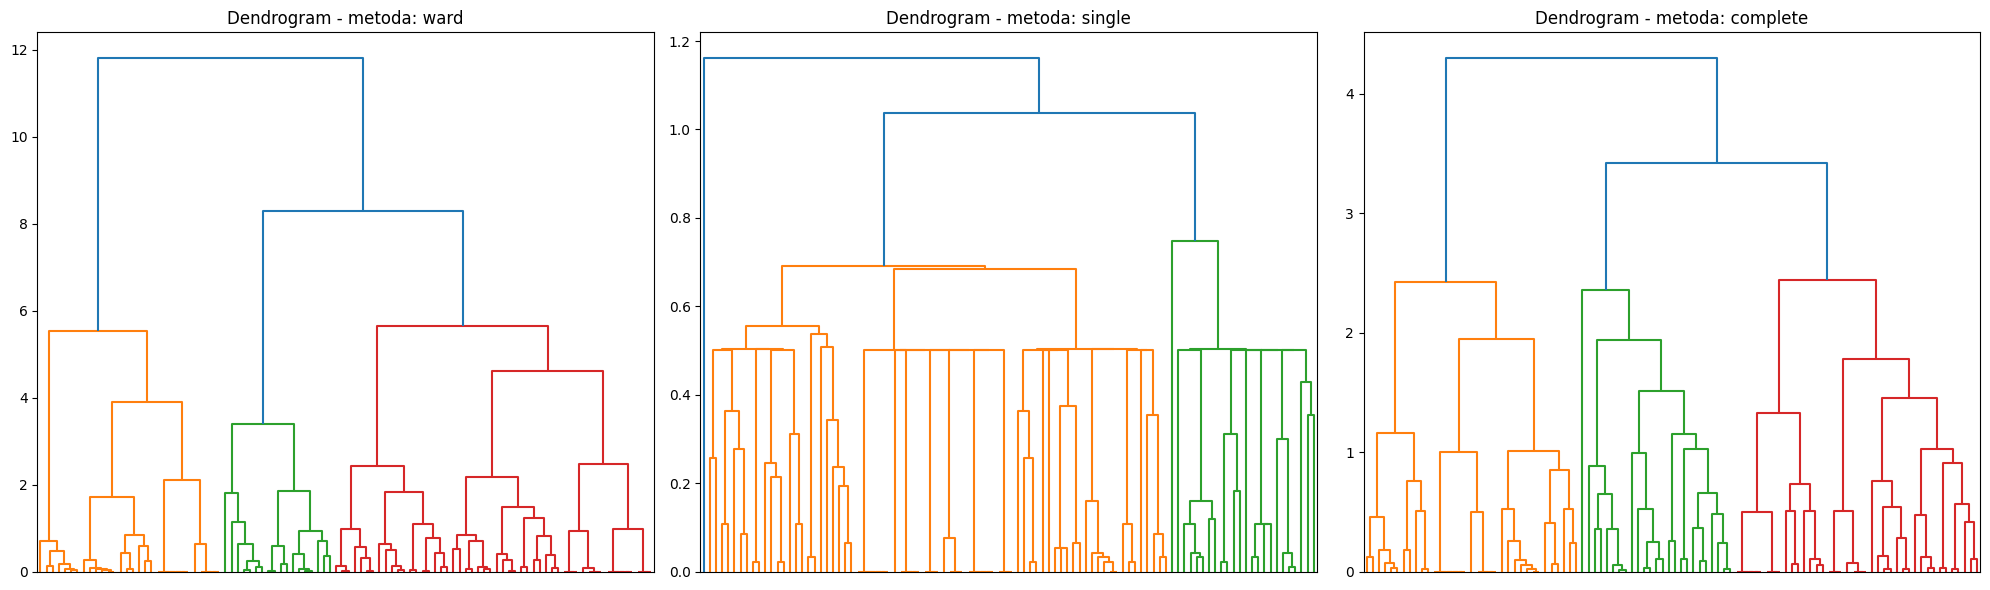

In [58]:
from scipy.cluster.hierarchy import linkage, dendrogram

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

# Przygotowanie danych do klasteryzacji hierarchicznej
features = df[['Value', 'Hour', 'DayOfWeek']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Próbka danych do dendrogramu (dla przejrzystości)
sample_data = features_scaled[:100]

# Rysowanie dendrogramów dla różnych metod łączenia
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
linkage_methods = ['ward', 'single', 'complete']

for ax, method in zip(axes, linkage_methods):
    linked = linkage(sample_data, method=method)
    dendrogram(linked, ax=ax, no_labels=True, distance_sort='ascending')
    ax.set_title(f'Dendrogram - metoda: {method}')

plt.tight_layout()
plt.show()



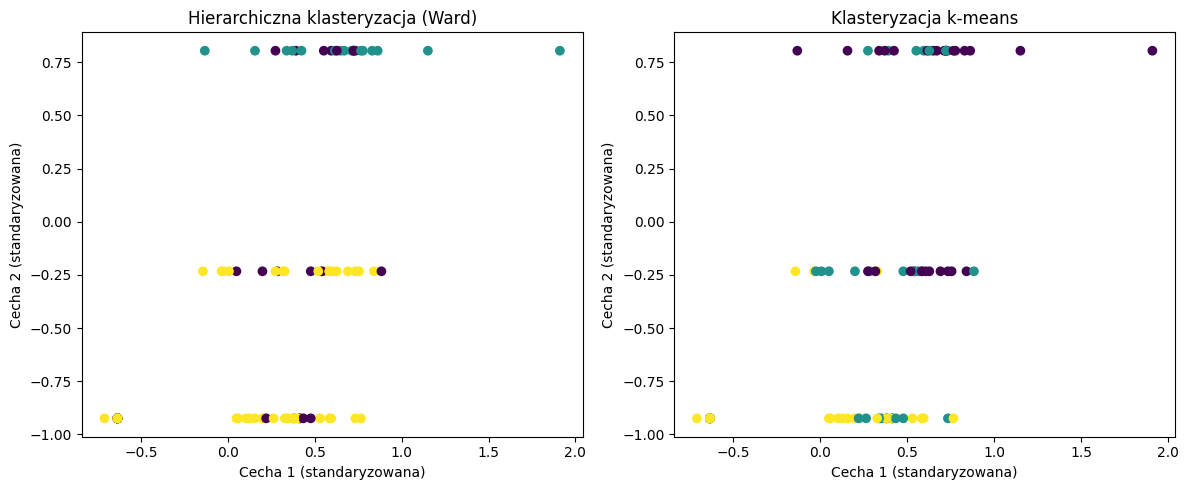

In [59]:
from scipy.cluster.hierarchy import fcluster

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Użyjemy 100 pierwszych próbek do porównania (dla przejrzystości)
sample_data = features_scaled[:100]

# Klasteryzacja hierarchiczna (metoda Ward)
linked = linkage(sample_data, method='ward')
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')  # 3 klastry

# Klasteryzacja k-means (dla porównania)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(sample_data)

# Porównanie wizualne
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(sample_data[:, 0], sample_data[:, 1], c=hierarchical_labels, cmap='viridis')
axs[0].set_title('Hierarchiczna klasteryzacja (Ward)')

axs[1].scatter(sample_data[:, 0], sample_data[:, 1], c=kmeans_labels, cmap='viridis')
axs[1].set_title('Klasteryzacja k-means')

for ax in axs:
    ax.set_xlabel('Cecha 1 (standaryzowana)')
    ax.set_ylabel('Cecha 2 (standaryzowana)')

plt.tight_layout()
plt.show()


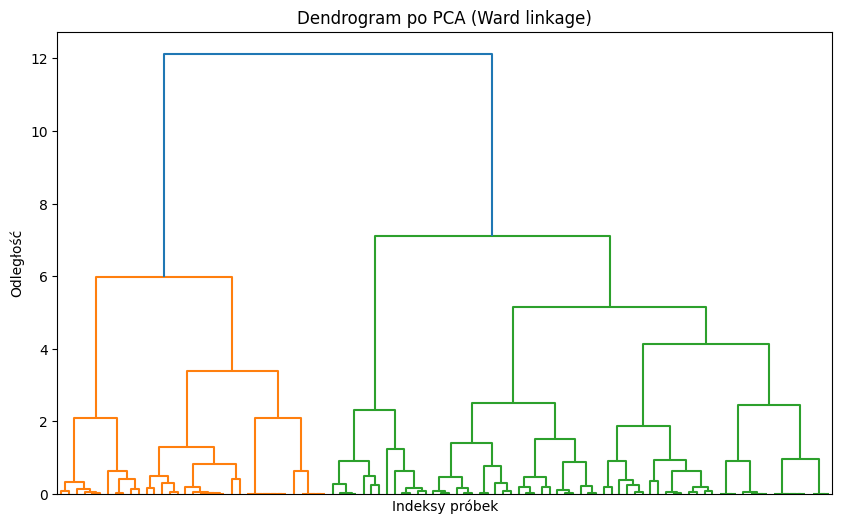

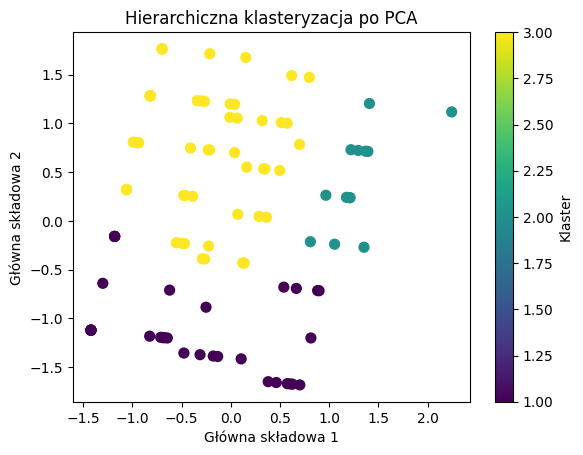

In [60]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA - redukcja do 2 składowych
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Próbka 100 punktów dla czytelności dendrogramu
sample_pca = features_pca[:100]

# Klasteryzacja hierarchiczna na danych po PCA
linked_pca = linkage(sample_pca, method='ward')
clusters_pca = fcluster(linked_pca, t=3, criterion='maxclust')

# Wizualizacja dendrogramu
plt.figure(figsize=(10, 6))
dendrogram(linked_pca, no_labels=True)
plt.title('Dendrogram po PCA (Ward linkage)')
plt.xlabel('Indeksy próbek')
plt.ylabel('Odległość')
plt.show()

# Wizualizacja skupień
plt.scatter(sample_pca[:, 0], sample_pca[:, 1], c=clusters_pca, cmap='viridis', s=50)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Hierarchiczna klasteryzacja po PCA')
plt.colorbar(label='Klaster')
plt.show()
